In [22]:
import pandas as pd

In [23]:
def calculate_cagr(valueRange, duration):
    """ This calculates the CAGR(Compounded Annual Growth Rate) for the prices
    given and duration specificed in tuple valueRange(start, end) and 
    duration in year"""
    
    cagr     = 0.0
    finalVal = valueRange[1]
    startVal = valueRange[0]
    try:    
        cagr = float((finalVal/startVal)**(1/duration) - 1)
    except Exception as e:
        pass
    
    return round(float(100*cagr), 2)


In [24]:
tvColumList = ["Year", "Equity", "Profit", "ROE"]


tvRoeReturn    = 10   # ROE value which would be constant over the time
tvIntialEquity = 10   # initial captial(equity)
tvNumberOfYear = 21   # let's us calculate it for 20 year

tvYearList   = []
tvEquityList = []
tvProfitList = []
tvRoeList    = []

tvYearList.append(0)
tvEquityList.append(tvIntialEquity)
tvProfitList.append(tvIntialEquity*tvRoeReturn/100)
tvRoeList.append(tvRoeReturn)

for index in range(1, tvNumberOfYear):
    tvYearList.append(index)
    tvTotalCurrentYearEquity = tvEquityList[index -1] + tvProfitList[index - 1]
    tvEquityList.append(tvTotalCurrentYearEquity)
    tvProfitList.append(tvTotalCurrentYearEquity*tvRoeReturn/100)
    tvRoeList.append(tvRoeReturn)


tvEquityList = [round(item,1) for item in tvEquityList]
tvProfitList = [round(item,1) for item in tvProfitList]


inputDic = {tvColumList[0]:tvYearList,\
            tvColumList[1]:tvEquityList,\
            tvColumList[2]:tvProfitList,\
            tvColumList[3]:tvRoeList
            }

df = pd.DataFrame(inputDic, columns=tvColumList)
df = df.reset_index(drop=True)
df = df.set_index(tvColumList[0])

In [25]:
# let us see the content of the dataframe at this point of time.
df.head(30)

,Equity,Profit,ROE
Year,,,
0,10.0,1.0,10
1,11.0,1.1,10
2,12.1,1.2,10
3,13.3,1.3,10
4,14.6,1.5,10
5,16.1,1.6,10
6,17.7,1.8,10
7,19.5,1.9,10
8,21.4,2.1,10


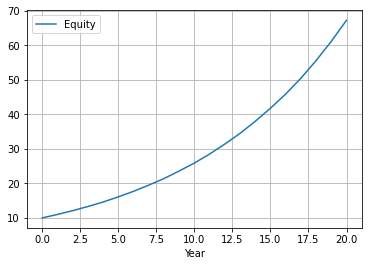

In [26]:
# Let us plot how Equity(company worth) grows over the time
df = df.drop([tvColumList[2],tvColumList[3]], axis=1)
df.plot(grid=True)

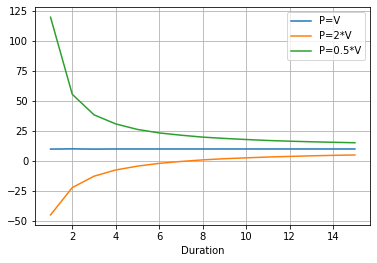

In [27]:
# now lets us calculate series of returns in case when somebody buys at
tvStartYearToBuy = 5

discountColumnList = ["Duration","P=V","P=2*V","P=0.5*V"]

tvDurationList              =  []
tvPAndValueSameList         =  []
tvTwicePOfValueList         =  []
tvFiftyPercentOfValueList   =  []


for index in range(tvStartYearToBuy, tvNumberOfYear-1):
    tvDuration = (index + 1) - tvStartYearToBuy
    tvGetCagr = calculate_cagr((tvEquityList[tvStartYearToBuy], tvEquityList[index+1]), tvDuration)
    tvPAndValueSameList.append(round(tvGetCagr,1))
    tvDurationList.append(tvDuration)

for index in range(tvStartYearToBuy, tvNumberOfYear-1):
    tvDuration = (index + 1) - tvStartYearToBuy
    tvGetCagr = calculate_cagr((2*tvEquityList[tvStartYearToBuy], tvEquityList[index+1]), tvDuration)
    tvTwicePOfValueList.append(round(tvGetCagr,1))


for index in range(tvStartYearToBuy, tvNumberOfYear-1):
    tvDuration = (index + 1) - tvStartYearToBuy
    tvGetCagr = calculate_cagr((0.5*tvEquityList[tvStartYearToBuy], tvEquityList[index+1]), tvDuration)
    tvFiftyPercentOfValueList.append(round(tvGetCagr,1))


tvInputDic = {discountColumnList[0]:tvDurationList,\
              discountColumnList[1]:tvPAndValueSameList,\
              discountColumnList[2]:tvTwicePOfValueList,\
              discountColumnList[3]:tvFiftyPercentOfValueList,\
             }

tvDfReturn = pd.DataFrame(tvInputDic, columns= discountColumnList)

tvDfReturn = tvDfReturn.reset_index(drop=True)
tvDfReturn = tvDfReturn.set_index(discountColumnList[0])

tvDfReturn.plot(grid=True)


In [28]:
# let us see the content of the dataframe at this point of time.
tvDfReturn.head(30)

,P=V,P=2*V,P=0.5*V
Duration,,,
1,9.9,-45.0,119.9
2,10.1,-22.2,55.6
3,9.9,-12.7,38.5
4,10.0,-7.5,30.9
5,10.0,-4.3,26.3
6,10.0,-2.0,23.4
7,10.0,-0.4,21.5
8,10.0,0.9,19.9
9,10.0,1.9,18.8
